In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### data cleaning

In [ ]:
column_names=["AMAZON INDEX (ASIN)","FILENAME","IMAGE URL","TITLE","AUTHOR","CATEGORY ID","CATEGORY"]
df=pd.read_csv(r"/content/drive/MyDrive/projects/NLP/book classification/dataset/book32-listing.csv", encoding='latin1',names=column_names)


In [ ]:
df = df.drop(columns=["IMAGE URL","FILENAME","AMAZON INDEX (ASIN)","AUTHOR"])
df

,TITLE,CATEGORY ID,CATEGORY
0,Mom's Family Wall Calendar 2016,3,Calendars
1,Doug the Pug 2016 Wall Calendar,3,Calendars
2,"Moleskine 2016 Weekly Notebook, 12M, Large, Bl...",3,Calendars
3,365 Cats Color Page-A-Day Calendar 2016,3,Calendars
4,Sierra Club Engagement Calendar 2016,3,Calendars
...,...,...,...
207567,ADC the Map People Washington D.C.: Street Map...,29,Travel
207568,"Washington, D.C., Then and Now: 69 Sites Photo...",29,Travel
207569,"The Unofficial Guide to Washington, D.C. (Unof...",29,Travel
207570,"Washington, D.C. For Dummies (Dummies Travel)",29,Travel


In [ ]:
df["TITLE"] = df["TITLE"].str.replace(',','')
df["TITLE"] = df["TITLE"].str.replace('.', '')
df["TITLE"] = df["TITLE"].str.replace('-', ' ')
df["TITLE"] = df["TITLE"].str.replace(':', '')

In [ ]:
df

,TITLE,CATEGORY ID,CATEGORY
0,Mom's Family Wall Calendar 2016,3,Calendars
1,Doug the Pug 2016 Wall Calendar,3,Calendars
2,Moleskine 2016 Weekly Notebook 12M Large Black...,3,Calendars
3,365 Cats Color Page A Day Calendar 2016,3,Calendars
4,Sierra Club Engagement Calendar 2016,3,Calendars
...,...,...,...
207567,ADC the Map People Washington DC Street Map Book,29,Travel
207568,Washington DC Then and Now 69 Sites Photograph...,29,Travel
207569,The Unofficial Guide to Washington DC (Unoffic...,29,Travel
207570,Washington DC For Dummies (Dummies Travel),29,Travel


<Axes: ylabel='Frequency'>

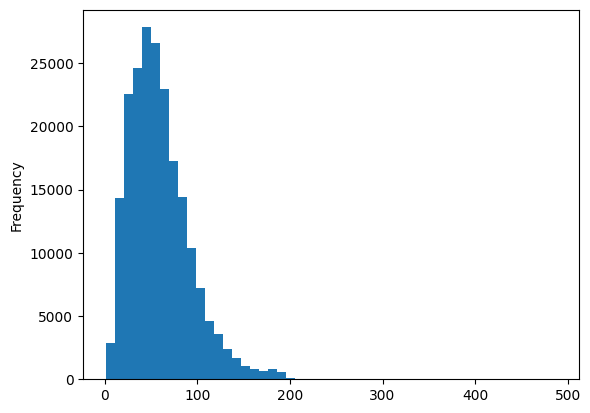

In [ ]:
df["TITLE"].str.len().plot.hist(bins=50)

In [ ]:
uniqueClasses = df["CATEGORY"].unique()
uniqueClasses = sorted(list(uniqueClasses))
id2label = {id:label for id,label in enumerate(uniqueClasses)}
label2id = {label:id for id,label in enumerate(uniqueClasses)}

In [ ]:
id2label

{0: 'Arts & Photography',
 1: 'Biographies & Memoirs',
 2: 'Business & Money',
 3: 'Calendars',
 4: "Children's Books",
 5: 'Christian Books & Bibles',
 6: 'Comics & Graphic Novels',
 7: 'Computers & Technology',
 8: 'Cookbooks, Food & Wine',
 9: 'Crafts, Hobbies & Home',
 10: 'Education & Teaching',
 11: 'Engineering & Transportation',
 12: 'Gay & Lesbian',
 13: 'Health, Fitness & Dieting',
 14: 'History',
 15: 'Humor & Entertainment',
 16: 'Law',
 17: 'Literature & Fiction',
 18: 'Medical Books',
 19: 'Mystery, Thriller & Suspense',
 20: 'Parenting & Relationships',
 21: 'Politics & Social Sciences',
 22: 'Reference',
 23: 'Religion & Spirituality',
 24: 'Romance',
 25: 'Science & Math',
 26: 'Science Fiction & Fantasy',
 27: 'Self-Help',
 28: 'Sports & Outdoors',
 29: 'Teen & Young Adult',
 30: 'Test Preparation',
 31: 'Travel'}

In [ ]:
print(y_test)

[23, 8, 24, 29, 8, 8, 9, 9, 29, 16, 26, 6, 23, 24, 6, 28, 8, 15, 9, 8, 27, 8, 10, 16, 15, 11, 6, 24, 4, 1, 0, 11, 21, 13, 27, 14, 27, 2, 29, 11, 15, 13, 4, 25, 11, 3, 6, 13, 24, 15, 23, 7, 23, 11, 8, 29, 6, 7, 25, 14, 21, 16, 4, 29, 12, 29, 10, 4, 2, 20, 19, 26, 25, 4, 25, 18, 21, 27, 11, 4, 26, 26, 13, 29, 26, 4, 23, 2, 20, 27, 2, 23, 27, 21, 29, 1, 27, 2, 0, 29, 11, 22, 16, 0, 4, 6, 13, 26, 14, 21, 16, 21, 6, 16, 3, 2, 0, 19, 28, 9, 13, 3, 12, 20, 28, 26, 6, 2, 18, 2, 14, 26, 7, 13, 29, 6, 13, 21, 0, 8, 21, 27, 25, 10, 2, 11, 13, 19, 6, 6, 27, 11, 9, 7, 9, 16, 4, 7, 19, 15, 11, 25, 19, 29, 22, 9, 12, 9, 29, 2, 21, 11, 2, 4, 15, 24, 29, 24, 21, 12, 10, 16, 9, 23, 4, 16, 29, 5, 29, 13, 4, 21, 29, 16, 4, 27, 6, 22, 4, 2, 4, 26, 1, 15, 14, 21, 27, 4, 29, 9, 29, 23, 4, 27, 9, 9, 5, 29, 23, 20, 15, 11, 23, 15, 4, 15, 23, 0, 22, 9, 24, 4, 29, 12, 4, 7, 2, 9, 25, 2, 29, 4, 9, 11, 4, 21, 29, 21, 8, 9, 6, 2, 31, 19, 29, 2, 11, 7, 19, 4, 15, 11, 11, 4, 25, 15, 21, 9, 24, 2, 14, 18, 14, 25, 7, 8

<Axes: ylabel='count'>

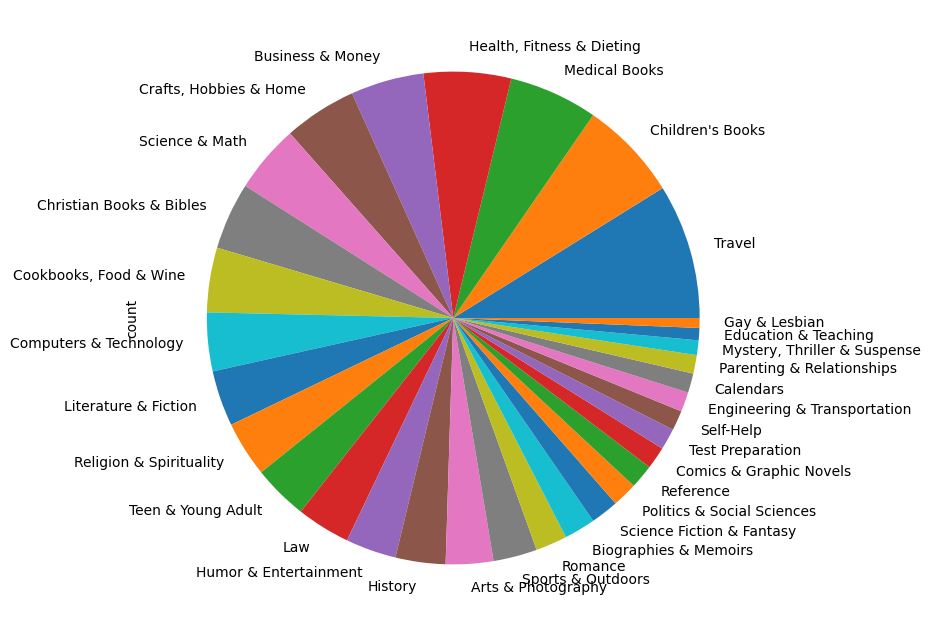

In [ ]:
df.CATEGORY.value_counts().plot(kind ='pie', figsize=(8,8))

In [ ]:
# list conversion
X = df["TITLE"].to_list()
y = df["CATEGORY ID"].to_list()

###Train Test split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0 )
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.01, random_state=0 )

In [ ]:
# X_train = X_train[:1000]
# y_train = y_train[:1000]
# X_val = X_val[:500]
# y_val = y_val[:500]

### Tokinezier

In [ ]:
from transformers import RobertaTokenizer, TFDistilBertForSequenceClassification

checkpoint = "distilroberta-base"
tokenizer = RobertaTokenizer.from_pretrained(checkpoint, max_length=64)

train_encodings = tokenizer(X_train, truncation=True, padding=True, return_tensors='tf')
val_encodings = tokenizer(X_val, padding='max_length', truncation=True, max_length=64, return_tensors='tf')
# train_encodings = tokenizer(X_train, truncation=True, padding=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(len(X_train)).batch(16)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    y_val
)).batch(16)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]

###Fine-tuning

In [ ]:
val_dataset

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 80), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 80), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# from transformers import TFTrainingArguments, Trainer
# from accelerate import Accelerator
# training_args = TFTrainingArguments(
#     output_dir='./resule',
#     num_train_epochs=2,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size= 16,
#     warmup_steps=50,
#     weight_decay=1e-5,
#     logging_dir="./log",
#     eval_steps=100
# )
# with training_args.strategy.scope():
trainer_model = TFDistilBertForSequenceClassification.from_pretrained(checkpoint, num_labels=32)
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]

trainer_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# trainer = Trainer(
#     model = trainer_model,
#     args = training_args,
#     train_dataset = train_dataset,
#     eval_dataset = val_dataset,
#     # gradient_accumulation_steps = 2
# )

You are using a model of type roberta to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['roberta.encoder.layer.3.attention.output.LayerNorm.bias', 'roberta.encoder.layer.2.attention.output.LayerNorm.weight', 'roberta.encoder.layer.0.attention.self.query.bias', 'roberta.encoder.layer.5.attention.self.key.weight', 'roberta.encoder.layer.4.attention.self.value.weight', 'roberta.pooler.dense.weight', 'roberta.encoder.layer.1.attention.self.value.bias', 'roberta.encoder.layer.3.output.dense.bias', 'roberta.encoder.layer.4.intermediate.dense.weight', 'roberta.encoder.layer.3.attention.output.dense.weight', 'roberta.encoder.layer.0.attention.self.query.weight', 'roberta.encoder.layer.2.attention.self.key.bias', 'roberta.encoder.layer.4.attention.self.query.bias', 'roberta.encoder.layer.4.output.dense.bias', 'roberta.encoder.layer.4.output.dense.weight', 'roberta.encoder.layer.5.output.dense.weight', 'roberta.encoder.layer.1.output.LayerNorm.weight', 'roberta

In [ ]:
trainer_model.fit(train_dataset, epochs=3, validation_data=val_dataset)

Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10275/10275 [==============================] - 2781s 266ms/step - loss: 2.0460 - accuracy: 0.4416 - val_loss: 1.6224 - val_accuracy: 0.5572
Epoch 2/3
10275/10275 [==============================] - 2654s 258ms/step - loss: 1.4281 - accuracy: 0.6062 - val_loss: 1.4820 - val_accuracy: 0.5940
Epoch 3/3
10275/10275 [==============================] - 2698s 263ms/step - loss: 1.1948 - accuracy: 0.6649 - val_loss: 1.4385 - val_accuracy: 0.6102


In [ ]:
trainer_model.save_pretrained('./distilroberta_model')
tokenizer.save_pretrained('./distilroberta_tokenizer')

('./distilroberta_tokenizer/tokenizer_config.json',
 './distilroberta_tokenizer/special_tokens_map.json',
 './distilroberta_tokenizer/vocab.json',
 './distilroberta_tokenizer/merges.txt',
 './distilroberta_tokenizer/added_tokens.json')

In [ ]:
test_encodings = tokenizer(X_test, truncation=True, padding=True)
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(16)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
loss, accuracy = trainer_model.evaluate(test_dataset)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

# Get predictions
test_predictions = trainer_model.predict(test_dataset)
test_predictions = np.argmax(test_predictions.logits, axis=1)

# Classification report
# report = classification_report(y_test, test_predictions, target_names=label_encoder.classes_)
# print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print(conf_matrix)

104/104 [==============================] - 4s 43ms/step - loss: 1.3999 - accuracy: 0.6141
Validation Loss: 1.39987313747406
Validation Accuracy: 0.6140878796577454
104/104 [==============================] - 4s 36ms/step
[[ 26   3   0 ...   2   0   0]
 [  0   9   0 ...   3   0   0]
 [  0   0  71 ...   1   0   1]
 ...
 [  2   0   5 ... 122   0   0]
 [  0   2   0 ...   0   5   0]
 [  0   0   3 ...   0   0   9]]


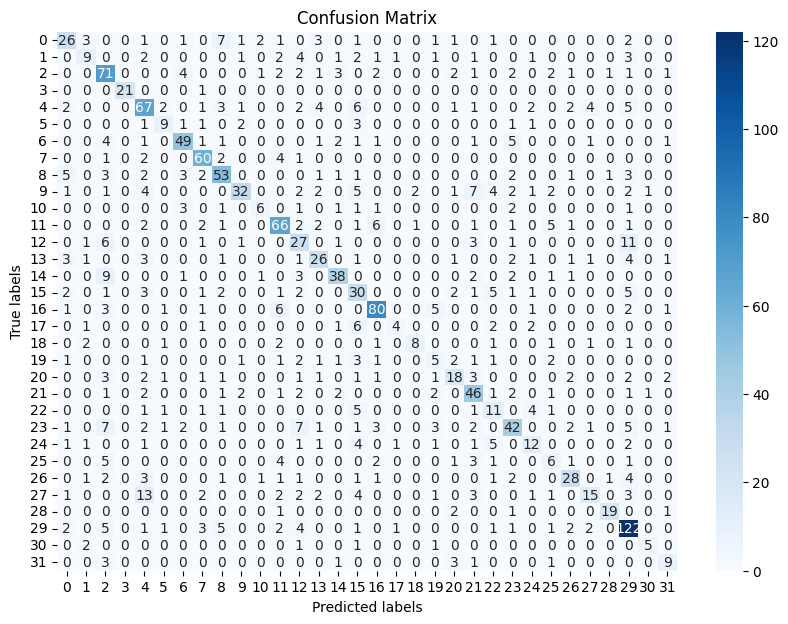

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `conf_matrix` is your confusion matrix
# If not, replace `conf_matrix` with your actual confusion matrix
# For example:
# conf_matrix = confusion_matrix(val_labels, val_predictions)

# Define labels for the heatmap
labels = label_encoder.classes_

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()